# Minerando Dados
* Rodrigo Santana 
* E-mail para contato: contato@minerandodados.com.br
* Site: www.minerandodados.com.br


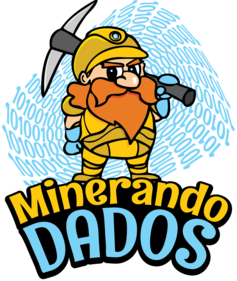

In [2]:
from IPython.display import Image
Image('minerador.png',width=300, height=200)

** Importando as bibliotecas necessárias**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

In [4]:
dataset = pd.read_csv('titulo_noticias.txt',encoding='utf-8')

In [5]:
dataset.head(5)

,noticia,sentimento
0,diretor petrobras nega organização criminosa e...,positivo
1,tom cauteloso janet yellen pressiona bolsas f...,neutro
2,bovespa caminha nova máxima ano quarta alta s...,positivo
3,após abrir estável ibovespa passa registrar q...,negativo
4,paulo miranda reivindica iluminação telefonia...,positivo


In [6]:
dataset.count()

noticia       2123
sentimento    2123
dtype: int64

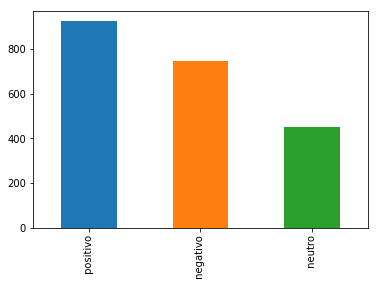

In [7]:
%matplotlib inline
dataset.sentimento.value_counts().plot(kind='bar')

**Distribuição das classes neutros, positivos e negativos**

** Modelo Simples**

In [8]:
from sklearn.pipeline import Pipeline

pip_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

**Função de avaliação de modelos**

In [9]:
def avalia_modelo(clf, X, y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    print (pd.crosstab(y, resultados, rownames=['Real'], colnames=['Predito'], margins=True))
    return np.mean(cross_val_score(clf, X, y, cv=5))

In [10]:
avalia_modelo(pip_simples,dataset.noticia,dataset.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        531       39        176   746
 neutro          103      142        207   452
 positivo        111       63        751   925
All              745      244       1134  2123


0.6707639451209663

** Função para tag de Negações**

In [11]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return resultado

** Visualizando a função de negações**

In [12]:
print (marque_negacao('Eu gosto do Brasil'))
print (marque_negacao('Eu não gosto do Brasil'))

['eu', 'gosto', 'do', 'brasil']
['eu', 'não', 'gosto_NEG', 'do_NEG', 'brasil_NEG']


** Cria o pipeline que utiliza a função de negações**

In [13]:
pip_neg = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

**Avaliando o modelo com negações**

In [14]:
avalia_modelo(pip_neg,dataset.noticia,dataset.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        520       43        183   746
 neutro          105      142        205   452
 positivo        115       64        746   925
All              740      249       1134  2123


0.6632311724583536

# **União de Features**

* Classes para fazer união de features

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class QtdPalavras(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def tamanho_noticia(self, texto):
        return len(texto.split())
    
    def transform(self, news, y=None):
        vet_tam = []
        vet_tam_2 = []
        for n in news:
            vet_tam.append(self.tamanho_noticia(n))
        vet_tam_2 = [[i] for i in vet_tam]
        return vet_tam_2
    
    def fit(self, df, y=None):
        return self

In [16]:
from sklearn.pipeline import FeatureUnion

In [17]:
features = FeatureUnion([('QuantidadePalavras',QtdPalavras())])

In [18]:
dataset['qtd_palavras'] = features.fit_transform(dataset.noticia,dataset.sentimento)
dataset.head()

,noticia,sentimento,qtd_palavras
0,diretor petrobras nega organização criminosa e...,positivo,8
1,tom cauteloso janet yellen pressiona bolsas f...,neutro,8
2,bovespa caminha nova máxima ano quarta alta s...,positivo,8
3,após abrir estável ibovespa passa registrar q...,negativo,9
4,paulo miranda reivindica iluminação telefonia...,positivo,7


In [19]:
dataset.drop(['qtd_palavras'], axis=1, inplace=True)

**Cria classes para uniao de features**

** Cria o primeiro pipeline para processamento do texto**

In [20]:
text_process = Pipeline([
                ('count', CountVectorizer())
            ])
text_process.fit_transform(dataset.noticia)

<2123x3803 sparse matrix of type '<class 'numpy.int64'>'
	with 17325 stored elements in Compressed Sparse Row format>

** Cria o segundo pipeline para a segunda feature**

In [21]:
qtd_palavras =  Pipeline([
                ('qtd_palavras', QtdPalavras())
            ])
qtd_palavras.fit_transform(dataset.noticia)

[[8],
 [8],
 [8],
 [9],
 [7],
 [8],
 [10],
 [7],
 [10],
 [6],
 [9],
 [14],
 [11],
 [8],
 [15],
 [7],
 [6],
 [10],
 [11],
 [6],
 [9],
 [11],
 [7],
 [7],
 [10],
 [7],
 [9],
 [10],
 [10],
 [5],
 [5],
 [8],
 [7],
 [7],
 [10],
 [7],
 [8],
 [10],
 [6],
 [11],
 [10],
 [8],
 [6],
 [7],
 [10],
 [9],
 [8],
 [9],
 [7],
 [6],
 [8],
 [8],
 [9],
 [9],
 [4],
 [14],
 [9],
 [13],
 [8],
 [9],
 [11],
 [6],
 [6],
 [4],
 [9],
 [4],
 [10],
 [7],
 [2],
 [7],
 [12],
 [6],
 [9],
 [9],
 [10],
 [8],
 [6],
 [7],
 [12],
 [10],
 [6],
 [11],
 [4],
 [13],
 [8],
 [7],
 [6],
 [9],
 [8],
 [7],
 [10],
 [12],
 [3],
 [10],
 [7],
 [8],
 [7],
 [6],
 [7],
 [11],
 [10],
 [7],
 [5],
 [5],
 [8],
 [7],
 [9],
 [7],
 [7],
 [5],
 [10],
 [15],
 [8],
 [8],
 [11],
 [6],
 [6],
 [2],
 [7],
 [5],
 [9],
 [7],
 [2],
 [7],
 [5],
 [7],
 [8],
 [7],
 [11],
 [8],
 [4],
 [8],
 [8],
 [6],
 [11],
 [9],
 [7],
 [6],
 [9],
 [6],
 [7],
 [13],
 [10],
 [4],
 [10],
 [9],
 [12],
 [7],
 [7],
 [9],
 [8],
 [12],
 [10],
 [8],
 [11],
 [9],
 [9],
 [9],
 [5],
 [9

** Feature Union com Pipelines**

In [22]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras)
                        ])

In [23]:
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None))])),
 ('qtd_palavras',
  Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())]))]

**Cria o pipeline que contém o objeto features**

In [24]:
pip_features_1 = Pipeline([
    ('features',features),
    ('classifier', MultinomialNB()),
])

In [25]:
pip_features_1

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('text_process', Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_d...nsformer_weights=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

** Avalia modelo com quantidade de palavras**

In [26]:
avalia_modelo(pip_features_1,dataset.noticia,dataset.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        528       19        199   746
 neutro          104      111        237   452
 positivo        110       36        779   925
All              742      166       1215  2123


0.6679393006205937

**Cria a classe Qtdcaracteres**

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class QtdPalavras(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def tamanho_noticia(self, texto):
        return len(texto.split())
    
    def transform(self, news, y=None):
        vet_tam = []
        vet_tam_2 = []
        for n in news:
            vet_tam.append(self.tamanho_noticia(n))
        vet_tam_2 = [[i] for i in vet_tam]
        return vet_tam_2
    
    def fit(self, df, y=None):
        return self
    
class QtdCaracteres(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def conta_caracteres(self, texto):
        return len(texto)
    
    def transform(self, news, y=None):
        vet_tam = []
        vet_tam_2 = []
        for n in news:
            vet_tam.append(self.conta_caracteres(n))
        vet_tam_2 = [[i] for i in vet_tam]
        return vet_tam_2
    
    def fit(self, df, y=None):
        return self

In [28]:
qtd_caracteres =  Pipeline([
                            ('qtd_caracteres', QtdCaracteres())
                           ])
qtd_caracteres.fit_transform(dataset.noticia)

[[69],
 [61],
 [53],
 [66],
 [58],
 [56],
 [76],
 [51],
 [68],
 [53],
 [69],
 [97],
 [75],
 [72],
 [107],
 [46],
 [47],
 [69],
 [78],
 [40],
 [63],
 [77],
 [65],
 [46],
 [74],
 [48],
 [51],
 [74],
 [74],
 [36],
 [41],
 [58],
 [51],
 [59],
 [83],
 [56],
 [64],
 [69],
 [65],
 [82],
 [78],
 [69],
 [47],
 [45],
 [70],
 [54],
 [58],
 [66],
 [60],
 [42],
 [57],
 [58],
 [61],
 [66],
 [30],
 [117],
 [70],
 [79],
 [54],
 [64],
 [67],
 [47],
 [47],
 [27],
 [74],
 [25],
 [71],
 [59],
 [15],
 [56],
 [77],
 [50],
 [56],
 [56],
 [67],
 [55],
 [47],
 [68],
 [90],
 [71],
 [46],
 [74],
 [31],
 [93],
 [64],
 [48],
 [53],
 [65],
 [51],
 [56],
 [72],
 [84],
 [26],
 [69],
 [47],
 [56],
 [61],
 [43],
 [57],
 [79],
 [74],
 [57],
 [43],
 [31],
 [68],
 [52],
 [73],
 [47],
 [50],
 [43],
 [69],
 [105],
 [54],
 [57],
 [77],
 [48],
 [41],
 [22],
 [52],
 [41],
 [70],
 [56],
 [13],
 [55],
 [45],
 [56],
 [67],
 [56],
 [70],
 [57],
 [36],
 [54],
 [57],
 [53],
 [71],
 [70],
 [56],
 [34],
 [69],
 [52],
 [61],
 [84],
 [7

**TF-IDF transformer**

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
text_process = Pipeline([
                ('counts', CountVectorizer()),
                ('tf-idf', TfidfTransformer())
               ])
text_process.fit_transform(dataset.noticia)

<2123x3803 sparse matrix of type '<class 'numpy.float64'>'
	with 17325 stored elements in Compressed Sparse Row format>

In [31]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras),
                         ('qtd_caracteres', qtd_caracteres),
                     ])

** Visualiza a lista de transformadores**

In [32]:
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('counts', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)), ('tf-idf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True))])),
 ('qtd_palavras',
  Pipeline(memory=None, steps=[('qtd_palavras', QtdPalavras())])),
 ('qtd_caracteres',
  Pipeline(memory=None, steps=[('qtd_caracteres', QtdCaracteres())]))]

In [33]:
pip_features_3 = Pipeline([
    ('features',features),
    ('classifier', MultinomialNB()),
])

In [34]:
avalia_modelo(pip_features_3,dataset.noticia,dataset.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        293        0        453   746
 neutro           53        5        394   452
 positivo         40        0        885   925
All              386        5       1732  2123


0.5572387331759703

**Aplicando Pre-processadores em algumas features**

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [36]:
qtd_palavras =  Pipeline([
                ('qtd_palavras', QtdPalavras()),
                ('Scaler', MinMaxScaler())
            ])
qtd_palavras.fit_transform(dataset.noticia)

array([[0.30434783],
       [0.30434783],
       [0.30434783],
       ...,
       [0.39130435],
       [0.13043478],
       [0.43478261]])

In [37]:
qtd_caracteres =  Pipeline([
                ('qtd_caracteres', QtdCaracteres()),
                ('Scaler', StandardScaler())
            ])
qtd_caracteres.fit_transform(dataset.noticia)

array([[ 0.38583758],
       [-0.06306401],
       [-0.51196561],
       ...,
       [ 0.61028838],
       [-1.07309261],
       [ 1.84476778]])

In [38]:
features = FeatureUnion([('text_process', text_process), 
                         ('qtd_palavras', qtd_palavras),
                         ('qtd_caracteres', qtd_caracteres),
                     ])

In [39]:
features.transformer_list

[('text_process', Pipeline(memory=None,
       steps=[('counts', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)), ('tf-idf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True))])),
 ('qtd_palavras', Pipeline(memory=None,
       steps=[('qtd_palavras', QtdPalavras()), ('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))])),
 ('qtd_caracteres', Pipeline(memory=None,
       steps=[('qtd_caracteres', QtdCaracteres()), ('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]))]

**Importa o algoritmo SVM**

In [40]:
from sklearn.svm import SVC

** Pipeline para Criação do Modelo usando SVM**

In [41]:
pip_features_4 = Pipeline([
    ('features',features),
    ('classifier', SVC(kernel='linear')),
])

**Avaliando o modelo**

In [42]:
avalia_modelo(pip_features_4,dataset.noticia,dataset.sentimento)

Predito     negativo   neutro   positivo   All
Real                                          
 negativo        536       49        161   746
 neutro          118      152        182   452
 positivo        122       63        740   925
All              776      264       1083  2123


0.672638554970221